In [1]:
import matplotlib
#matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

import pandas as pd
from pandas_summary import DataFrameSummary

from prediction.loader import read_bids_data
from prediction.loader import read_bidders_data
from prediction.loader import read_testset

from prediction.stats import get_stats
from prediction.stats import get_feature_target

from prediction.algo import get_predictions
from prediction.algo import get_regressor
from prediction.algo import get_metrics
from prediction.algo import get_feature_importance
from prediction.algo import get_confusion_matrix

# Data loading

In [2]:
bids = read_bids_data()

In [3]:
bidders = read_bidders_data()

# Features adding

In [4]:
stats = get_stats(bids)
DataFrameSummary(stats).columns_stats

/home/till/code/kaggle-human-or-robot/venv/local/lib/python2.7/site-packages/pandas/core/groupby.py:2919: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  inc = np.r_[1, val[1:] != val[:-1]]
/home/till/code/kaggle-human-or-robot/venv/local/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


,mean_nb_url,nb_distinct_merchandise,elapsed_time_std,elapsed_time_max,time_std,nb_distinct_url,time_range,ubiquity,mean_nb_bid_id,nb_distinct_auction,nb_distinct_ip,nb_bids,elapsed_time_min,mean_nb_ip,mean_nb_merchandise,mean_nb_country,nb_distinct_device
counts,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614
uniques,2146,2,5036,4134,5548,827,5314,304,2598,519,1169,1388,3929,2393,2,1379,605
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool,numeric,numeric


In [5]:
# Add column outcome
features, target = get_feature_target(stats, bidders)
pd.DataFrame(pd.DataFrame(target).groupby('outcome').size())

,0
outcome,
0.0,1881
1.0,103


# Predictions

In [6]:
clf_rf = get_regressor('random_forest')
p_rf = get_predictions(clf_rf, features, target)
fpr_rf, tpr_rf, t_rf, ps_rf, auc_rf = get_metrics(target, p_rf)

clf_gbr = get_regressor('gradient_boosting')
p_gbr = get_predictions(clf_gbr, features, target)
fpr_gbr, tpr_gbr, t_gbr, ps_gbr, auc_gbr = get_metrics(target, p_gbr)

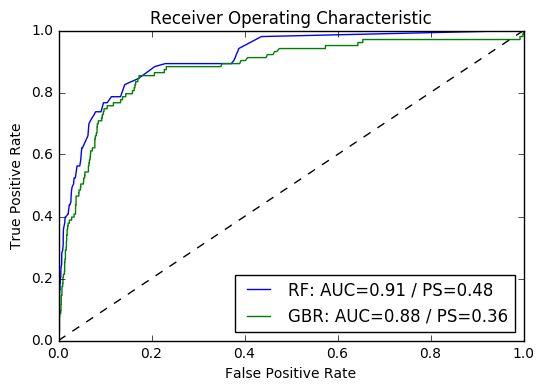

In [7]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b',
label='RF: AUC=%0.2f / PS=%0.2f'% (auc_rf,  ps_rf))
plt.plot(fpr_gbr, tpr_gbr, 'g',
label='GBR: AUC=%0.2f / PS=%0.2f'% (auc_gbr,  ps_gbr))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
t_rf

array([  1.97000000e+00,   9.70000000e-01,   7.90000000e-01,
         7.80000000e-01,   7.10000000e-01,   7.00000000e-01,
         6.90000000e-01,   6.60000000e-01,   6.50000000e-01,
         6.40000000e-01,   6.30000000e-01,   6.00000000e-01,
         5.90000000e-01,   5.80000000e-01,   5.70000000e-01,
         5.60000000e-01,   5.50000000e-01,   5.10000000e-01,
         5.00000000e-01,   4.90000000e-01,   4.80000000e-01,
         4.60000000e-01,   4.50000000e-01,   4.40000000e-01,
         4.30000000e-01,   4.20000000e-01,   4.10000000e-01,
         4.00000000e-01,   3.90000000e-01,   3.80000000e-01,
         3.70000000e-01,   3.60000000e-01,   3.50000000e-01,
         3.40000000e-01,   3.30000000e-01,   3.20000000e-01,
         3.10000000e-01,   3.00000000e-01,   2.90000000e-01,
         2.80000000e-01,   2.60000000e-01,   2.50000000e-01,
         2.40000000e-01,   2.30000000e-01,   2.20000000e-01,
         2.00000000e-01,   1.90000000e-01,   1.80000000e-01,
         1.70000000e-01,

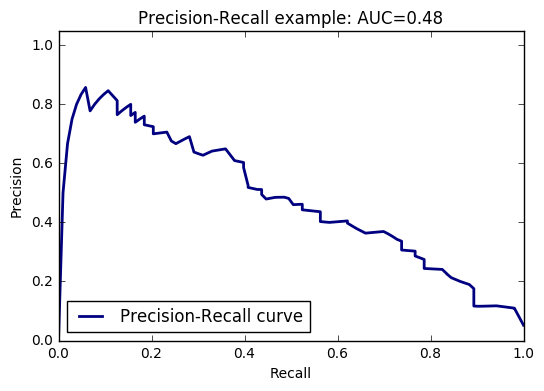

In [27]:
import sklearn.metrics as metrics
precision, recall, _ = metrics.precision_recall_curve(target, p_rf)
average_precision = metrics.average_precision_score(target, p_rf)

# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, lw=2, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()

In [9]:
print get_confusion_matrix(target, p_rf, 0.02)

          0         1
0  0.770335  0.229665
1  0.106796  0.893204


In [10]:
get_feature_importance(clf_rf, features, target)

,0,1
8,mean_nb_bid_id,0.209351
4,time_std,0.086623
13,mean_nb_ip,0.084642
6,time_range,0.082040
0,mean_nb_url,0.077031
11,nb_bids,0.060579
3,elapsed_time_max,0.058324
12,elapsed_time_min,0.054958
9,nb_distinct_auction,0.052794
16,nb_distinct_device,0.045455


In [11]:
get_feature_importance(clf_gbr, features, target)

,0,1
8,mean_nb_bid_id,0.23
13,mean_nb_ip,0.17
7,ubiquity,0.14
16,nb_distinct_device,0.11
11,nb_bids,0.08
9,nb_distinct_auction,0.05
0,mean_nb_url,0.05
5,nb_distinct_url,0.04
10,nb_distinct_ip,0.04
6,time_range,0.03


# Data balancing

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
sm = SMOTE(random_state=42, n_jobs=-1)
f_smoted, t_smoted = sm.fit_sample(features, target)

limit = len(features)

p_rfs = get_predictions(clf_rf, f_smoted, t_smoted)[:limit]
fpr_rfs, tpr_rfs, t_rfs, ps_rfs, auc_rfs = get_metrics(t_smoted[:limit], p_rfs)

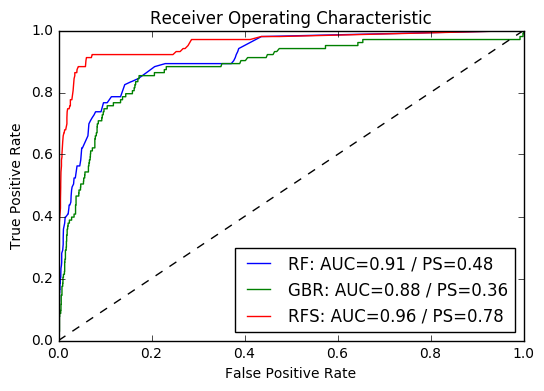

In [14]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b',
label='RF: AUC=%0.2f / PS=%0.2f'% (auc_rf,  ps_rf))
plt.plot(fpr_gbr, tpr_gbr, 'g',
label='GBR: AUC=%0.2f / PS=%0.2f'% (auc_gbr,  ps_gbr))
plt.plot(fpr_rfs, tpr_rfs, 'r',
label='RFS: AUC=%0.2f / PS=%0.2f'% (auc_rfs,  ps_rfs))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
t_rfs

array([ 1.        ,  0.99      ,  0.97      ,  0.96      ,  0.95      ,
        0.94      ,  0.93      ,  0.92      ,  0.91      ,  0.89      ,
        0.88      ,  0.87      ,  0.86      ,  0.85      ,  0.84      ,
        0.83      ,  0.82      ,  0.8       ,  0.79      ,  0.78      ,
        0.77      ,  0.75      ,  0.74      ,  0.73      ,  0.71      ,
        0.7       ,  0.69      ,  0.68      ,  0.67      ,  0.66      ,
        0.64405462,  0.64      ,  0.62      ,  0.61      ,  0.6       ,
        0.59      ,  0.58      ,  0.56      ,  0.55      ,  0.54      ,
        0.53      ,  0.52      ,  0.5       ,  0.49      ,  0.47      ,
        0.46      ,  0.45      ,  0.44      ,  0.43      ,  0.42      ,
        0.4       ,  0.39      ,  0.38      ,  0.37      ,  0.36      ,
        0.35      ,  0.34      ,  0.33      ,  0.32      ,  0.31      ,
        0.3       ,  0.29      ,  0.28      ,  0.27      ,  0.26      ,
        0.25      ,  0.24      ,  0.23      ,  0.22      ,  0.21

In [16]:
len(t_rfs)

119

In [17]:
get_confusion_matrix(t_smoted[:limit], p_rfs, 0.3)

,0,1
0,0.908559,0.091441
1,0.077670,0.922330


# Submission file creation

In [28]:
testset = pd.read_csv("data/test.csv.zip", header=0)
features_test, _ = get_feature_target(stats, testset)
DataFrameSummary(features_test).columns_stats

,mean_nb_url,nb_distinct_merchandise,elapsed_time_std,elapsed_time_max,time_std,nb_distinct_url,time_range,ubiquity,mean_nb_bid_id,nb_distinct_auction,nb_distinct_ip,nb_bids,elapsed_time_min,mean_nb_ip,mean_nb_merchandise,mean_nb_country,nb_distinct_device
counts,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630
uniques,1572,1,3500,3001,3871,635,3750,233,1898,440,915,1081,2883,1750,1,1007,516
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,constant,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,constant,numeric,numeric


In [19]:
completion = pd.DataFrame(list(set(testset.bidder_id).difference(set(features_test.index))), columns = ['bidder_id'])
completion['prediction'] = 0.0

In [20]:
clf = clf_rf.fit(features, target)
predictions_test = (clf.predict(features_test) >= 0.04) + 0.0

results = pd.DataFrame([features_test.index, predictions_test]).T
results.columns = ['bidder_id', 'prediction']
results = pd.concat([results, completion])
results.to_csv("data/submission.csv", index=False, header=True)